<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<ipython-input-1-ac6c38f61204>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:07:36   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.811  

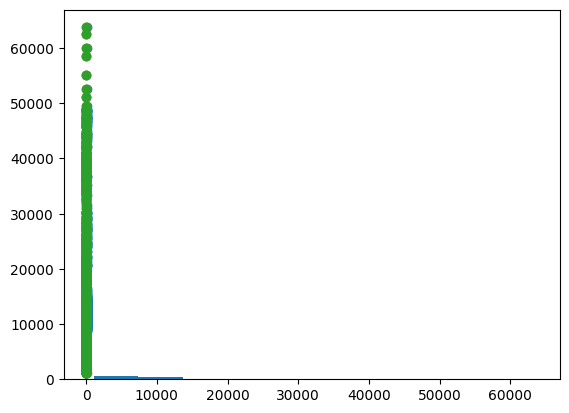

In [1]:
# Multiple Regression 4 - Insurance Data Set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf

df = pd.read_csv("insurance.csv")
df.head()

df.info()

df.sex.value_counts()
df.smoker.value_counts()
df.region.value_counts()

df.describe()

plt.hist(df.expenses, bins=10);

df.corr()

plt.scatter(df.age, df.expenses)

plt.scatter(df.bmi, df.expenses)

plt.scatter(df.children, df.expenses)

# Linear Model using SKLEARN
df_final = pd.get_dummies(df)

X = df_final.drop('expenses', axis =1).values
y = df_final.expenses.values

lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)

r2_score(y, y_hat)

# Linear Model using STATSMODEL
results = smf.ols('expenses ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest ', data=df_final).fit()
print(results.summary())

# Linear Model using SKLEARN
df_final['age2'] = df_final.age**2
df_final['bmi30'] = (df_final['bmi']>=30) * 1
df_final['bmi30_smoker'] = (df_final['bmi']>=30) * df_final.smoker_yes

df_final.columns

X = df_final[['age', 'age2',  'children', 'bmi', 'sex_male', 'bmi30', 'smoker_yes', 
              'region_northwest', 'region_southeast', 'region_southwest', 'bmi30_smoker']].values
y = df_final.expenses.values

lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)
y_hat

r2_score(y, y_hat)

# Linear Model using STATSMODEL
results = smf.ols('expenses ~ age+age2+children+bmi+sex_male+bmi30+smoker_yes+region_northwest+region_southeast+region_southwest+bmi30_smoker'
                , data=df_final).fit()

print(results.summary())

